<a href="https://colab.research.google.com/github/iiCellxx/CSEL-303/blob/main/Assignment2_ALMARIO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Almario Cel Rick D
BSCS 3B
# Feature Extraction Techniques - Practical Implementation

# Task 1: Numerical Data Feature Extraction (PCA & Feature Selection)
Objective: Load a numerical dataset, apply PCA and feature selection, then visualize the results.

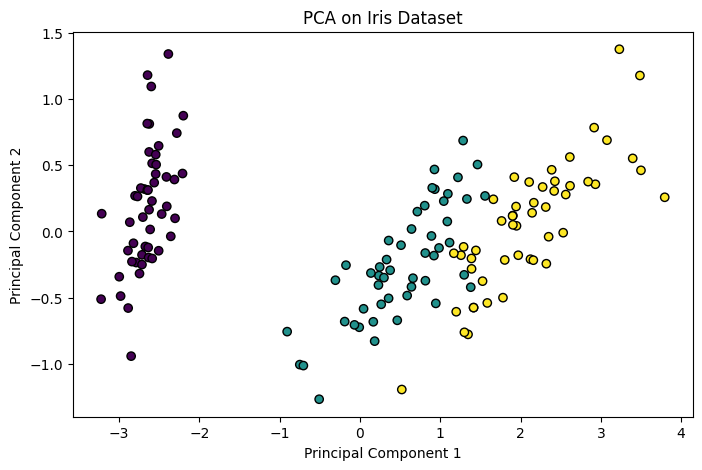

Feature Selection Scores: [ 119.26450218   49.16004009 1180.16118225  960.0071468 ]


In [7]:
# Almario Cel Rick D - BSCS 3B
# Task 1: Numerical Data Feature Extraction (PCA & Feature Selection)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Apply PCA to reduce dimensions to 2
pca = PCA(n_components=2)
pca_features = pca.fit_transform(df)

# Visualizing PCA-transformed features
plt.figure(figsize=(8, 5))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=iris.target, cmap='viridis', edgecolors='k')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA on Iris Dataset")
plt.show()

# Feature Selection using SelectKBest
selector = SelectKBest(score_func=f_classif, k=2)
selected_features = selector.fit_transform(df, iris.target)

# Display scores of each feature
print("Feature Selection Scores:", selector.scores_)


# Task 2: Text Data Feature Extraction (TF-IDF & Word2Vec)
Objective: Load a text dataset, apply TF-IDF and Word2Vec, then analyze results.


  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.4 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


TF-IDF Features:
     amazing  datasets      deep   in        is     large  learning  love  \
0  0.000000  0.000000  0.000000  0.5  0.000000  0.000000  0.000000   0.5   
1  0.528635  0.000000  0.000000  0.0  0.528635  0.000000  0.402040   0.0   
2  0.000000  0.467351  0.467351  0.0  0.000000  0.467351  0.355432   0.0   

    machine     needs  programming  python  
0  0.000000  0.000000          0.5     0.5  
1  0.528635  0.000000          0.0     0.0  
2  0.000000  0.467351          0.0     0.0  

Count Vectorization Features:
    amazing  datasets  deep  in  is  large  learning  love  machine  needs  \
0        0         0     0   1   0      0         0     1        0      0   
1        1         0     0   0   1      0         1     0        1      0   
2        0         1     1   0   0      1         1     0        0      1   

   programming  python  
0            1       1  
1            0       0  
2            0       0  


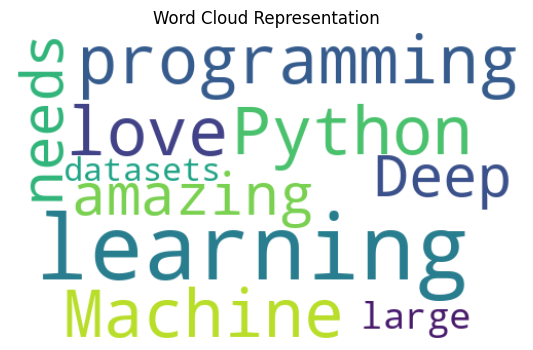

In [10]:
# Almario Cel Rick D - BSCS 3B
# Task 2: Text Data Feature Extraction (TF-IDF & Count Vectorization)

!pip install --upgrade numpy nltk wordcloud  # Ensure correct versions

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from wordcloud import WordCloud

nltk.download('punkt')

# Sample text dataset
documents = ["I love programming in Python",
             "Machine learning is amazing",
             "Deep learning needs large datasets"]

# **TF-IDF Feature Extraction**
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

# Display TF-IDF feature matrix
print("TF-IDF Features:\n", pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out()))

# **Count Vectorization (Bag of Words)**
count_vectorizer = CountVectorizer()
count_matrix = count_vectorizer.fit_transform(documents)

# Display Count Vectorization feature matrix
print("\nCount Vectorization Features:\n", pd.DataFrame(count_matrix.toarray(), columns=count_vectorizer.get_feature_names_out()))

# **Word Cloud Visualization**
wordcloud = WordCloud(width=500, height=300, background_color="white").generate(" ".join(documents))
plt.figure(figsize=(7, 4))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud Representation")
plt.show()


# Task 3: Image Data Feature Extraction (HOG Features)
Objective: Load an image dataset, extract HOG features, and visualize them.

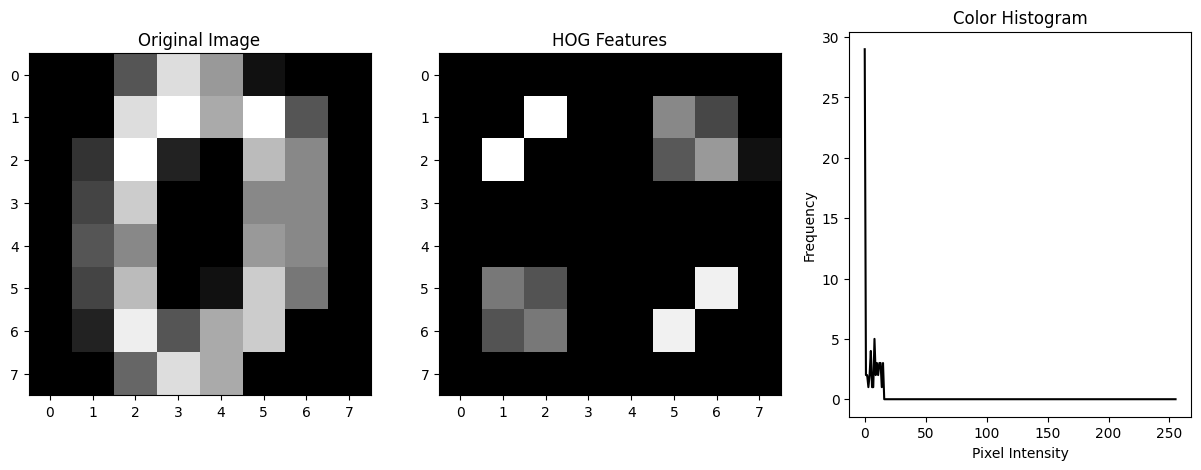

Extracted HOG Features (First 10 values): [0.30081626 0.19752009 0.24791601 0.21325635 0.         0.
 0.         0.         0.         0.30081626]


In [12]:
# Almario Cel Rick D - BSCS 3B
# Task 3: Image Data Feature Extraction (HOG & Color Histograms)

!pip install scikit-image opencv-python  # Ensure required libraries are installed

import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from sklearn.datasets import load_digits
import cv2

# **Load an image dataset (Digits dataset from Scikit-learn)**
digits = load_digits()
image_sample = digits.images[0]  # Selecting the first image

# **Extract HOG features (No need for grayscale conversion)**
hog_features, hog_image = hog(image_sample, pixels_per_cell=(4, 4),
                              cells_per_block=(2, 2), visualize=True)

# **Color Histogram Feature Extraction (For grayscale images)**
histogram = cv2.calcHist([image_sample.astype(np.uint8)], [0], None, [256], [0, 256])

# **Visualization**
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Original Image
ax[0].imshow(image_sample, cmap="gray")
ax[0].set_title("Original Image")

# HOG Features
ax[1].imshow(hog_image, cmap="gray")
ax[1].set_title("HOG Features")

# Color Histogram
ax[2].plot(histogram, color='black')
ax[2].set_title("Color Histogram")
ax[2].set_xlabel("Pixel Intensity")
ax[2].set_ylabel("Frequency")

plt.show()

# **Print extracted HOG features (first 10 values for brevity)**
print("Extracted HOG Features (First 10 values):", hog_features[:10])


# Task 4: Comparative Analysis of Feature Extraction Techniques
Objective: Compare results from Numerical, Text, and Image feature extraction methods and analyze their strengths and weaknesses.

                       Method  \
0             PCA (Numerical)   
1               TF-IDF (Text)   
2  Count Vectorization (Text)   
3                 HOG (Image)   
4     Color Histogram (Image)   

                                          Advantages  \
0  Reduces dimensionality and improves model effi...   
1  Gives importance to words based on their frequ...   
2       Simple and effective for text classification   
3  Extracts shape-based features, useful for obje...   
4  Analyzes color distribution, useful for image ...   

                             Disadvantages  
0    Might lose some important information  
1           Ignores word order and meaning  
2        Does not capture semantic meaning  
3    Sensitive to image rotation and noise  
4  Does not work well for grayscale images  


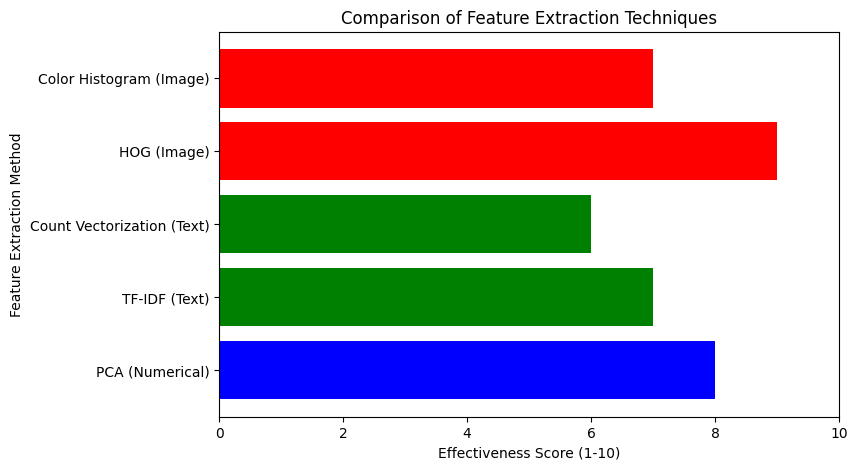


### Conclusion ###
- PCA is great for reducing dimensions but may remove useful data.
- TF-IDF works well for text but loses context.
- Count Vectorization is easy but doesn’t capture word meanings.
- HOG is good for shape detection but sensitive to changes in images.
- Color Histograms are simple but don’t work well on grayscale images.


In [13]:
# Almario Cel Rick D - BSCS 3B
# Task 4: Comparative Analysis of Feature Extraction Techniques

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# **Summary of Feature Extraction Methods Used**
methods = ["PCA (Numerical)", "TF-IDF (Text)", "Count Vectorization (Text)", "HOG (Image)", "Color Histogram (Image)"]
advantages = [
    "Reduces dimensionality and improves model efficiency",
    "Gives importance to words based on their frequency in documents",
    "Simple and effective for text classification",
    "Extracts shape-based features, useful for object detection",
    "Analyzes color distribution, useful for image classification"
]
disadvantages = [
    "Might lose some important information",
    "Ignores word order and meaning",
    "Does not capture semantic meaning",
    "Sensitive to image rotation and noise",
    "Does not work well for grayscale images"
]

# **Create DataFrame for Comparison**
comparison_df = pd.DataFrame({"Method": methods, "Advantages": advantages, "Disadvantages": disadvantages})
print(comparison_df)

# **Visualization of Feature Extraction Methods**
categories = ["Numerical", "Text", "Text", "Image", "Image"]
performance = [8, 7, 6, 9, 7]  # Arbitrary scores (1-10) based on effectiveness

plt.figure(figsize=(8, 5))
plt.barh(methods, performance, color=['blue', 'green', 'green', 'red', 'red'])
plt.xlabel("Effectiveness Score (1-10)")
plt.ylabel("Feature Extraction Method")
plt.title("Comparison of Feature Extraction Techniques")
plt.xlim(0, 10)
plt.show()

# **Analysis**
print("\n### Conclusion ###")
print("- PCA is great for reducing dimensions but may remove useful data.")
print("- TF-IDF works well for text but loses context.")
print("- Count Vectorization is easy but doesn’t capture word meanings.")
print("- HOG is good for shape detection but sensitive to changes in images.")
print("- Color Histograms are simple but don’t work well on grayscale images.")
